<a href="https://colab.research.google.com/github/msjun23/Deep-Learning-from-Scratch/blob/main/Chapter6/2_weight_init.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

가중치 초기화는 랜덤으로 설정하여야 한다.

In [1]:
# 가중치 초기값에 따라 은닉층 활성화 값들이 어떻게 변하는지 확인
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)    # 1000개의 데이터
node_num = 100    # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5   # 은닉층이 5개
activations = {}

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i - 1]

  w = np.random.randn(node_num, node_num) * 1

  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

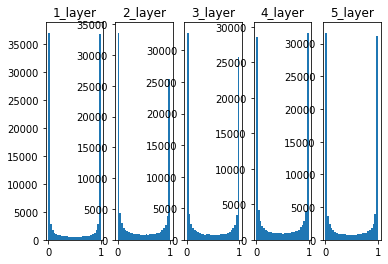

In [2]:
# 각 층의 활성화값 데이터를 히스토그램으로 확인
for i, a in activations.items():
  plt.subplot(1, len(activations), i + 1)
  plt.title(str(i+1) + '_layer')
  plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()

시스모이드 함수의 특징에 의해 출력이 0 / 1에 가까워지자 그 미분은 0에 가까워진다. 그래서 데이터가 0과 1에 치우쳐 분포하게 되면, 역전파의 기울기 값이 점점 작아지다가 사라진다. 이것을 기울기 소실(gradient vanishing)이라고 한다.

---

In [3]:
# 가중치 초기값에 따라 은닉층 활성화 값들이 어떻게 변하는지 확인
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)    # 1000개의 데이터
node_num = 100    # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5   # 은닉층이 5개
activations = {}

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i - 1]

  w = np.random.randn(node_num, node_num) * 0.01

  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

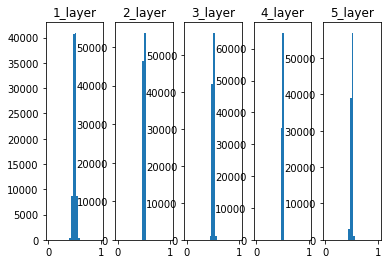

In [4]:
# 각 층의 활성화값 데이터를 히스토그램으로 확인
for i, a in activations.items():
  plt.subplot(1, len(activations), i + 1)
  plt.title(str(i+1) + '_layer')
  plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()

이번에는 각 데이터가 0.5 부근에 집중 되었다. 기울기 소실 문제는 일어나지 않지만, 활성화값들이 치우쳤다는 것은 표현력 관점에서 문제가 된다. 다수의 뉴런이 거의 같은 값을 출력한다는 것은 뉴런을 여러 개 둔 의미가 없다는 것이다.

---

# Xavier 초깃값

Xavier 초깃값은 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있다. 앞 계층의 노드가 $n$개라면 표준편차가 $\frac{1}{\sqrt n}$인 정규분포로 초깃값을 초기화하면 된다.

In [5]:
# 가중치 초기값에 따라 은닉층 활성화 값들이 어떻게 변하는지 확인
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)    # 1000개의 데이터
node_num = 100    # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5   # 은닉층이 5개
activations = {}

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i - 1]

  w = np.random.randn(node_num, node_num) / np.sqrt(node_num)   # 모든 층의 노드가 100개라고 단순화

  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

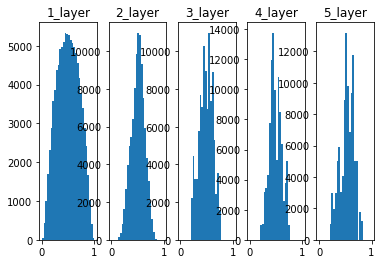

In [6]:
# 각 층의 활성화값 데이터를 히스토그램으로 확인
for i, a in activations.items():
  plt.subplot(1, len(activations), i + 1)
  plt.title(str(i+1) + '_layer')
  plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()

# ReLU를 사용할 때의 가중치 초기화

Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 하였다. sigmoid나 tanh 함수는 좌우 대칭으로 중앙 부근에서 선형인 함수로 볼 수 있다.

**ReLU** 함수를 이용할 때는 ReLU에 특화된 **He 초깃값**을 사용한다. He 초깃값은 앞 계층의 노드가 $n$개일 때, 표준편차가 $\sqrt\frac{2}{n}$인 정규분포를 사용한다. ReLU는 음수의 영역이 0이기 때문에 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 직관적으로 해석할 수 있다. 

결론 : 
- 활성화 함수로 ReLU -> He 초깃값
- 활성화 함수로 sigmoid, tanh 같은 S자 함수 -> Xavier 초깃값